# 2 DOF System



The data that describes our system and its loading:

In [2]:
k0, m0 = 1.0, 1.0 # ideally, dimensional units...
w20 = k0/m0
w0 = np.sqrt(w20)

k1, k2 = 2*k0, 3*k0
m1, m2 = 2*m0, 4*m0

M = np.array(((m1, 0), ( 0, m2)))
K = np.array(((k1+k2, -k2), (-k2, k2)))

p = np.array(( 0.0, 1.0)); w = 2.0*w0

print_mat(M, pre='\\boldsymbol{M}=m\\,', fmt='%d')
print_mat(K, pre='\\boldsymbol{K}=k\\,', fmt='%d')
print_mat(p[:,None], pre=r'\boldsymbol{p}(t) = p_0\,', fmt='%d',
          post='\\sin(%d\\omega_0t)'%w, mt='B')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Computing the eigenvalues and the eigenvectors

Using the `eigh` library function, specialized for Hermitian (symmetric) matrices.

We compute also the _starred_ matrices.  Note that the eigenvectors returned by `eigh` are normalized with respect to `M`, i.e., $M_i=m$ for every $i$.

In [3]:
evals, Psi = eigh(K, M)
Psi[:,0] /= Psi[0,0] ; Psi[:,1] /= Psi[1,1]
Mstar = Psi.T@M@Psi
Kstar = Psi.T@K@Psi
pstar = Psi.T@p

The `@` operator stands, in this context, for matrix multiplication.

We print the computed values.

In [4]:
print_mat(evals[None,:], mt='p', pre=r'\omega^2_i=\omega^2_o\,')
print_mat(Psi, pre=r'\boldsymbol{\Psi}=')
print_mat(Mstar, pre=r'\boldsymbol{M}^\star=m\,')
print_mat(Kstar, pre=r'\boldsymbol{K}^\star=k\,')
print_mat(pstar[:,None], pre=r'\boldsymbol{p}^\star=p_o\,', mt='B')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Modal Response

The modal equation of motion, divided by $M_i$
$$ \ddot q_i + \Lambda^2_i\omega_0^2 q_i = \frac{p_0}{k}\frac{k}{m}\frac{m}{M_i}\,p^\star_i \sin2\omega_0t.$$

The particular integral $\xi_i(t)$ is given by

$$\xi_i = \Delta_{st} \frac{\omega_0^2}{(\Lambda^2_i-4)\omega_0^2}\frac{m}{M_i}p^\star_i\sin2\omega_0t.$$

Eventually the modal response, computed in the hypotesis of initial rest conditions is

$$q_i = \frac{\Delta_{st}}{\Lambda^2_i-4}\frac{m}{M_i}p^\star_i(\sin2\omega_0t-\beta\sin\Lambda_i\omega_0t).$$

In [5]:
L  = np.sqrt(evals)
DAF = np.linalg.inv(Mstar)@(1.0/(L**2-w**2))
beta = w/L
t = np.linspace(0,50,1001)[:,None]
q = pstar*DAF*(np.sin(w*t)-beta*np.sin(L*t))

The definition of time vector is a bit complicated...

In [6]:
plt.style.use(['fivethirtyeight', '00_mplrc'])


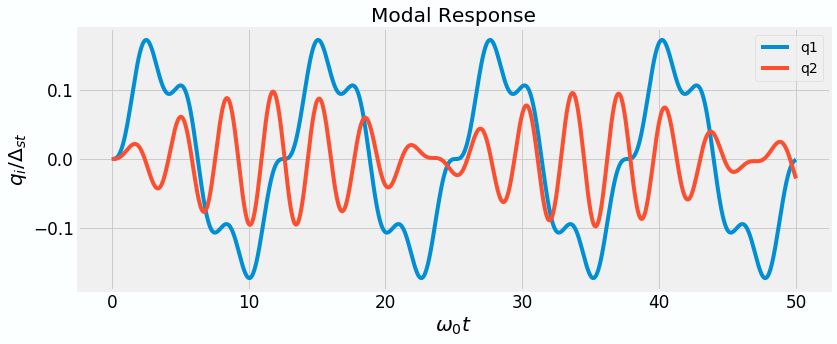

In [7]:
curves = plt.plot(t,q)
plt.legend(curves,['q1', 'q2'])
plt.title('Modal Response')
plt.xlabel('$\omega_0t$')
plt.ylabel('$q_i/\Delta_{st}$');
plt.tight_layout()
plt.savefig('../figures/modal_response.pdf')

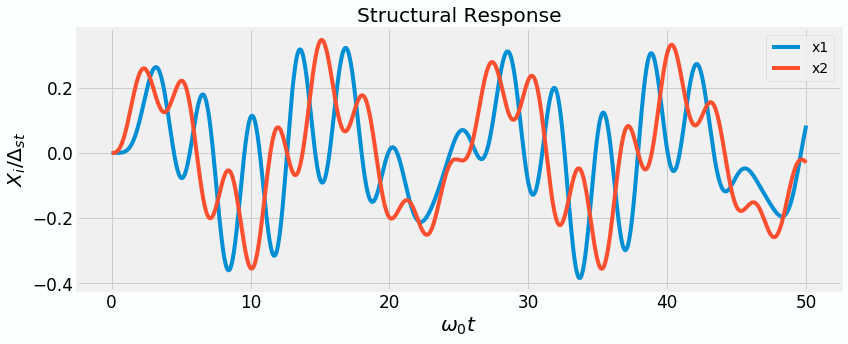

In [8]:
x = (Psi@q.T).T

curves = plt.plot(t, x)
plt.legend(curves,['x1', 'x2'])
plt.title('Structural Response')
plt.xlabel('$\omega_0t$')
plt.ylabel('$X_i/\Delta_{st}$')
plt.tight_layout()
plt.savefig('../figures/structural_response.pdf')

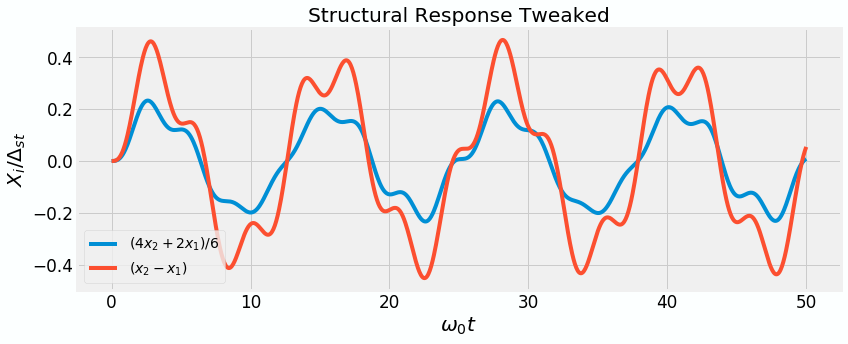

In [9]:
plt.plot(t, (2*x[:,0]+4*x[:,1])/6, label='$(4x_2+2x_1)/6$')
plt.plot(t, (x[:,1]+x[:,0])  , label='$(x_2-x_1)$')
plt.title('Structural Response Tweaked')
plt.xlabel('$\omega_0t$')
plt.ylabel('$X_i/\Delta_{st}$')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/tweaked.pdf')


The following code cell (that is executed _before_ any other code cell by the notebook) loads libraries (or functions from libraries) and determines the style of plots and of the notebook itself.  Besides the cell defines a function to format conveniently matrices and vectors.

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np ; from scipy.linalg import eigh
np.set_printoptions(suppress=False, linewidth=120)

from IPython.display import Latex

def print_mat(mat, pre='', post='', fmt='%.6f', mt='b'):
    display(Latex(
        r'$$' + pre + r'\begin{%smatrix}'%mt +
        r'\\'.join('&'.join(fmt%x for x in row) for row in mat) +
        r'\end{%smatrix}'%mt + post + r'$$'))

from IPython.display import HTML
HTML(open('00_custom.css').read())

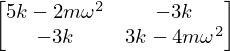

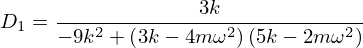

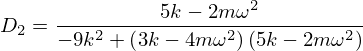

In [11]:
import sympy as sy
sy.init_printing(use_latex=1)
o, m0, k0 = sy.symbols('omega^2 m k')
k1, k2, m1, m2 = 2*k0, 3*k0, 2*m0, 4*m0
sM = sy.Matrix(((m1,0,),(0,m2)))
sK = sy.Matrix(((k1+k2, -k2),(-k2,k2)))
KooM = sK - o*sM
display(KooM)
display(KooM.det())
display(KooM.det().expand())
iKooM = KooM.inv()
sp = sy.Matrix(((0,),(1,)))
a,b=(iKooM*sp)
display(sy.Eq(sy.symbols('D_1'),a),sy.Eq(sy.symbols('D_2'),b))
a = a.expand().simplify().subs({m0:1,k0:1})
b = b.expand().simplify().subs({m0:1,k0:1});

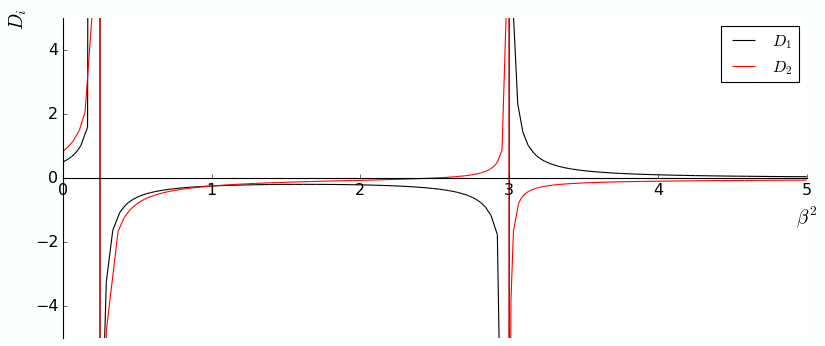

In [12]:
with plt.style.context(['classic', '00_mplrc']):
    plot = sy.plot(a, b, (o, 0, 5), ylim=(-5,5), show=False)
    plot[0].line_color = 'black'; plot[0].label = '$D_1$'
    plot[1].line_color = 'red'  ; plot[1].label = '$D_2$'
    plot.xlabel = r'$\beta^2$'
    plot.ylabel = r'$D_{i}$'
    plot.legend = True
    plot.show()